# Signals, Networks and Python (SNaP)
## Tanmoy Dasgupta
thetdg@live.com | Assistant Professor | Department of Electrical Engineering | Techno India University, Kolkata

SNaP, version 0.1.0  | Copyright (C) 2015 Tanmoy Dasgupta

The Python programmes in this IPython notbook are provided to you under the terms of GNU General Public License v3. You can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation;

This IPython notebook is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



## Representation of aperiodic signals with singularity functions
This notebook develops a few Python functions that can be used to create and visualize signals generated using combinations of singularity functions.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The following section defines the Heaviside unit step, the unit ramp and the unit parabolic functions. 

In [2]:
"""
This programme provides easily accessible and vectorized 
unit step, ramp and parabolic functions
Created by Tanmoy Dasgupta
"""
from numpy import array

#unit step function
def u(t):
    t = array(t).astype('float64')
    step_out = (t >= 0).astype('float64')
    return step_out

#unit ramp function
def r(t):
    t = array(t).astype('float64')
    ramp_out = t * (t >= 0).astype('float64')
    return ramp_out

#unit parabolic function
def p(t):
    t = array(t).astype('float64')
    parabolic_out = t * t * (t >= 0).astype('float64')
    return parabolic_out

In [3]:
# custom plotting configuration
import numpy as np
import matplotlib.pyplot as plt 

def snapplot(t, x):
    fig = plt.figure(figsize=(15, 4))
    axes = plt.gca()
    axes.set_xlim([np.amin(t), np.amax(t)])
    axes.set_ylim([np.amin(x) - 0.5, np.amax(x) + 0.5])
    plt.plot(t, x, 'k', lw=2)
    plt.xticks(np.arange(np.amin(t), np.amax(t) + 1, 1.0))
    plt.xlabel('t (sec)')
    plt.grid()

You can start working now! First define the linear space for time. Say, I want to consider $-5 \leq t \leq 5$. This is how I would do it.

In [4]:
t = linspace(-5, 5, 1000)

Let us start!

The **Heaviside unit step** is defined as 
$u(t)=\begin{cases}
1, & t>0\\
0, & t\leq 0
\end{cases}$.

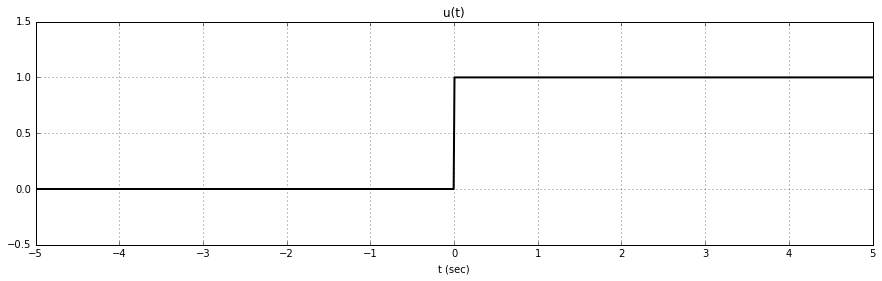

In [5]:
snapplot(t, u(t))
title('u(t)');

Now, **right shift** $u(t)$ by $2$ seconds. $u(t-2)=\begin{cases}
1, & t>2\\
0, & t\leq 2
\end{cases}$.

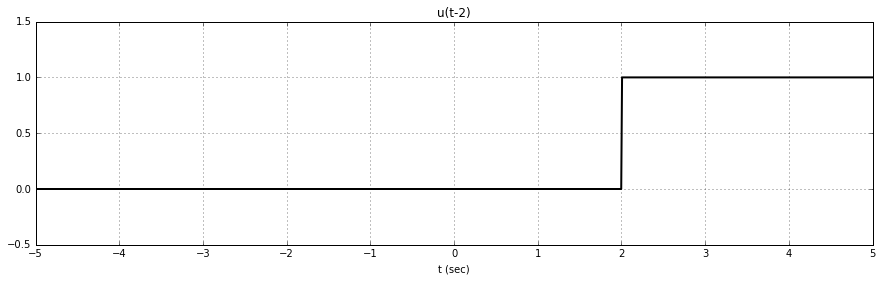

In [6]:
snapplot(t, u(t-2))
title('u(t-2)');

And, **left shift** $u(t)$ by $2$ seconds. $u(t+2)=\begin{cases}
1, & t>-2\\
0, & t\leq -2
\end{cases}$.

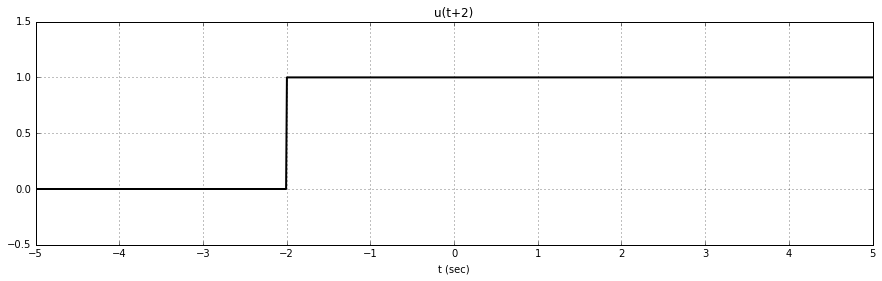

In [7]:
snapplot(t, u(t + 2))
title('u(t+2)');

Notice that multiplication of a step with a scalar will simply change its magnitude. Here is $2u(t)$

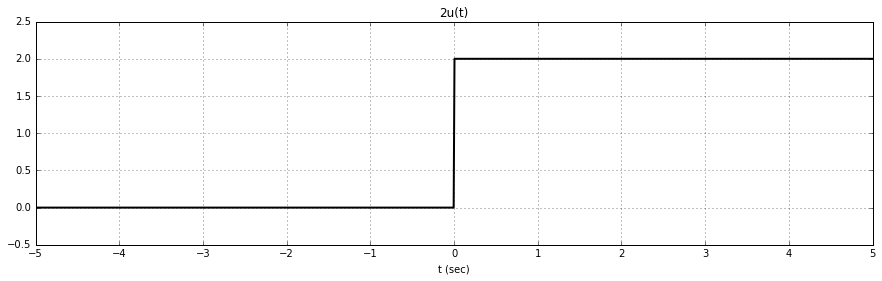

In [8]:
snapplot(t, 2 * u(t))
title('2u(t)');

And, say you turned the switch on at $t=0$ and then turned it off at $t=2$. The signal would be $u(t)-u(t-2)$.

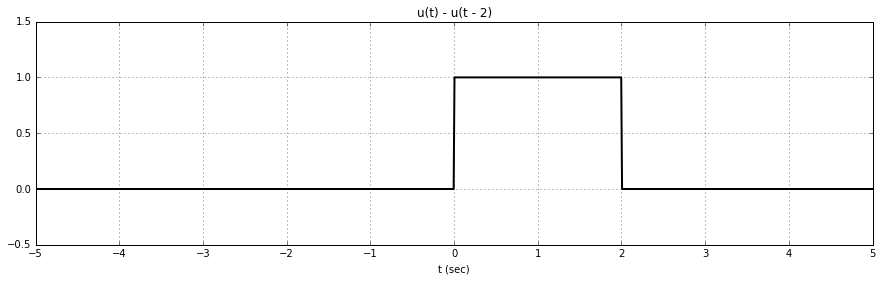

In [9]:
snapplot(t, u(t) - u(t - 2))
title('u(t) - u(t - 2)');

The **unit ramp** is given by 
$r(t)= t\,u(t)=\begin{cases}
t, & t>0\\
0, & t\leq 0
\end{cases} $.

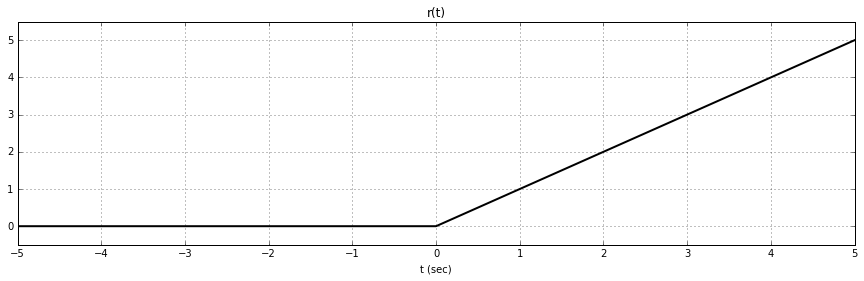

In [10]:
snapplot(t, r(t))
title('r(t)');

And this is a unit ramp delayed by 1 second 
$r(t-1)= (t-1)\,u(t-1)=\begin{cases}
t-1, & t>1\\
0, & t\leq 1
\end{cases} $.

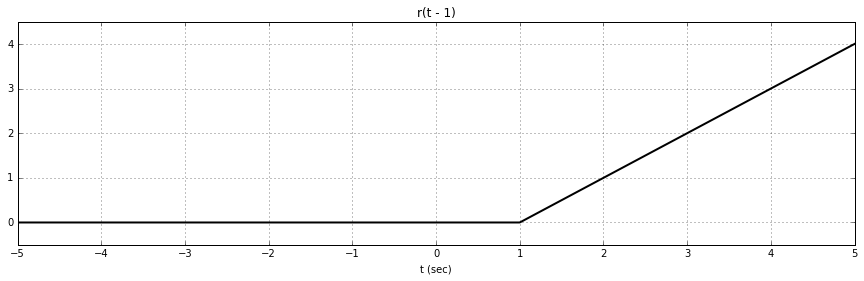

In [11]:
snapplot(t, r(t - 1))
title('r(t - 1)');

Next is $-r(t-1)$.

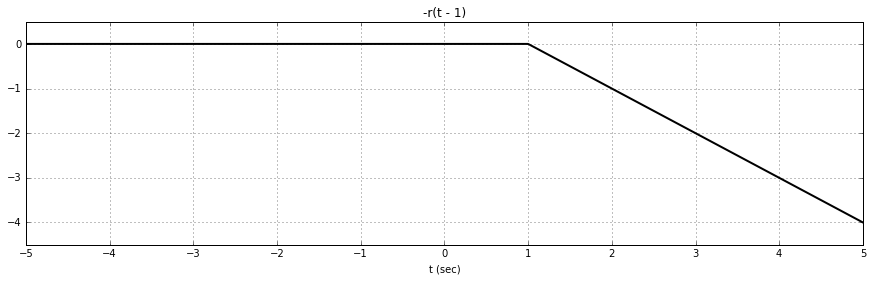

In [12]:
snapplot(t, -r(t - 1))
title('-r(t - 1)')

Notice that multiplying a ramp with a scalar will only change its slope. Consider $2r(t)$. Its slope is $2$.

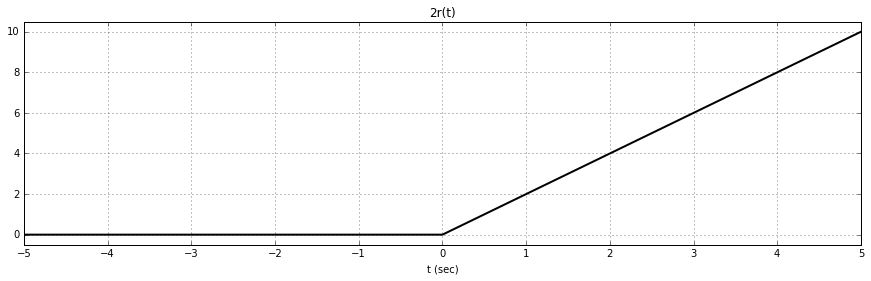

In [13]:
snapplot(t, 2 * r(t))
title('2r(t)');

Now consider a signal $x(t)=u(t)-r(t-1)+r(t-2)$. Here it is.

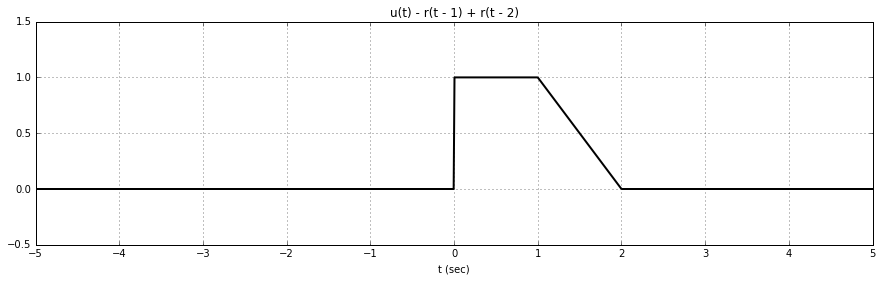

In [14]:
x = u(t) - r(t - 1) + r(t - 2)
snapplot(t, x)
title('u(t) - r(t - 1) + r(t - 2)');

Now, if we want to do some time domain operations on it, we have to define $x(t)$ as a Python function.

In [15]:
def x(t):
    return u(t) - r(t - 1) + r(t - 2)

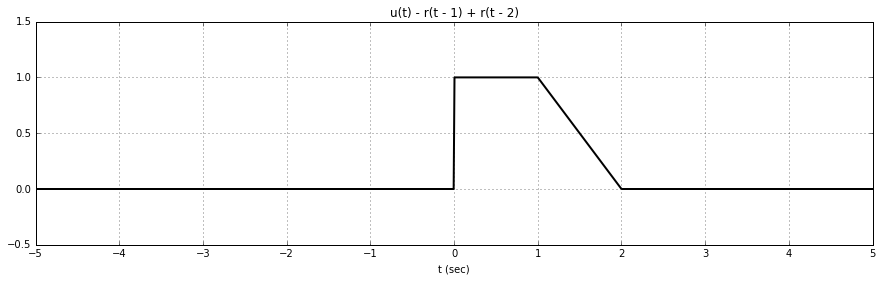

In [16]:
snapplot(t, x(t))
title('u(t) - r(t - 1) + r(t - 2)');

Let us plot $-x(t)$.

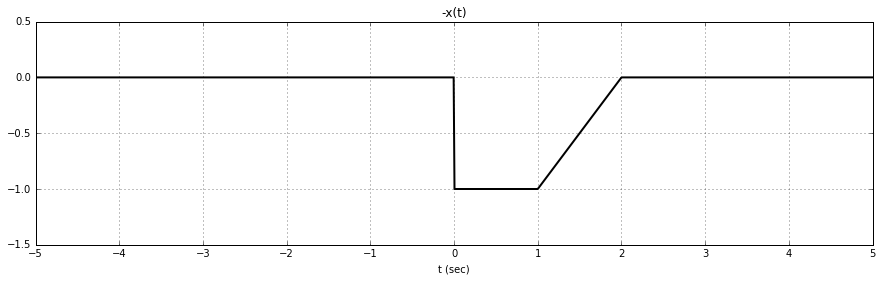

In [17]:
snapplot(t, -x(t))
title('-x(t)');

Next is **time reflection**. $x(-t)$ can be found by taking the mirror image of $x(t)$ about the vertical axis.

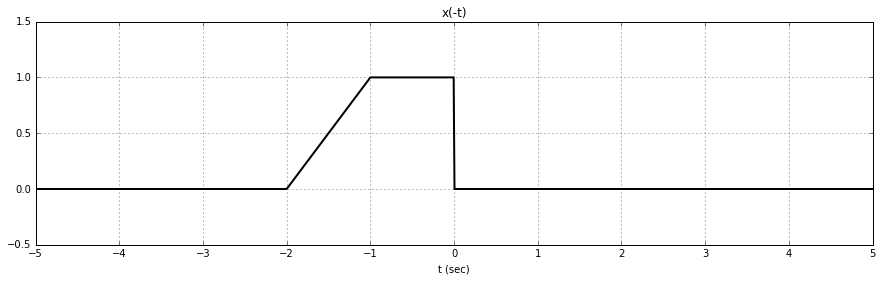

In [18]:
snapplot(t, x(-t))
title('x(-t)');

Left shift $x(t)$ by $1$ second.

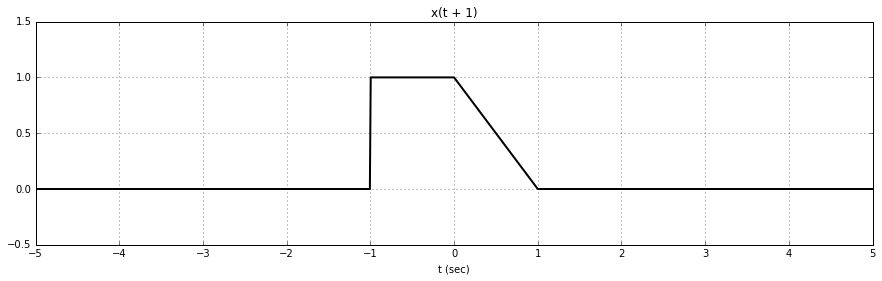

In [19]:
snapplot(t, x(t + 1))
title('x(t + 1)')

Right shift $x(t)$ by $1$ second.

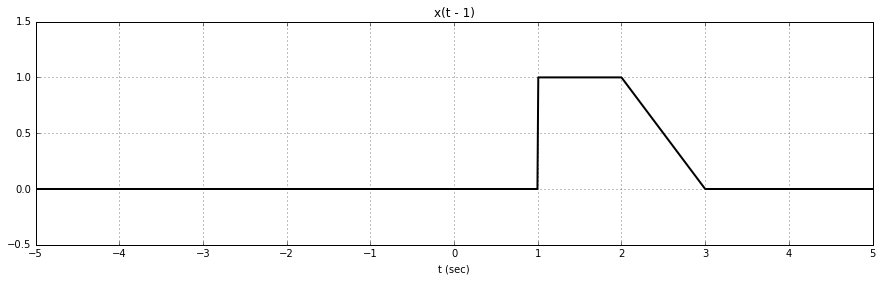

In [20]:
snapplot(t, x(t - 1))
title('x(t - 1)');

$x(2t)$ represents the **time contraction** of $x(t)$ by a time scaling factor of $2$.

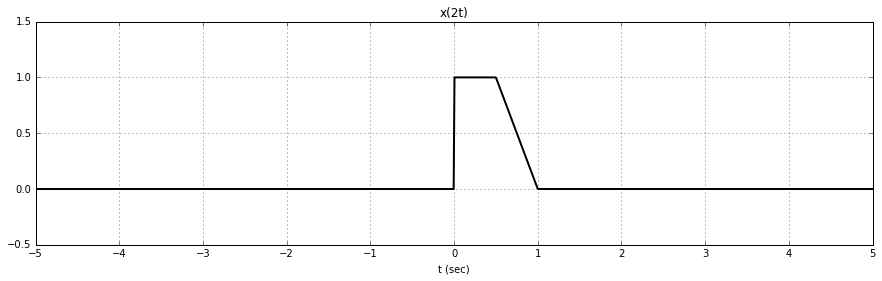

In [21]:
snapplot(t, x(2 * t))
title('x(2t)')

$x\left(\dfrac{t}{2}\right)$ represents the **time expansion** of $x(t)$ by a time scaling factor of $2$.

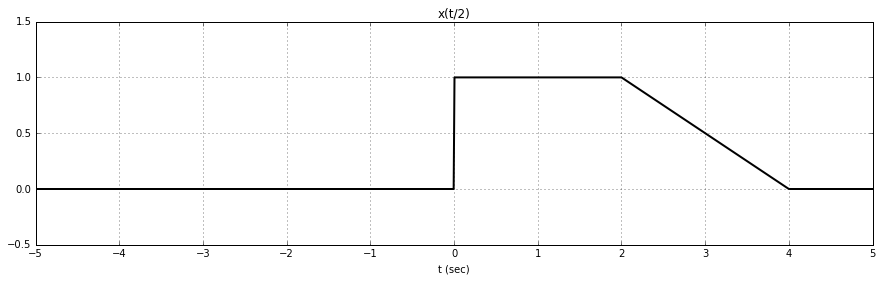

In [22]:
snapplot(t, x(t/2))
title('x(t/2)');

Now, say you want to plot $x(-2t+1)$. Do this: $x(-2t+1)=x\left(-2\left(t-\dfrac{1}{2}\right)\right)$. This represents a time reflection of $x(t)$, followed by a time contraction by a factor of $2$, followed by a right shift of $\dfrac{1}{2}$ seconds.

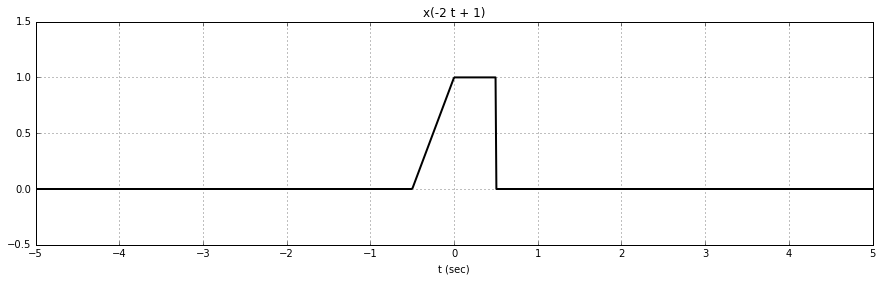

In [23]:
snapplot(t, x(-2 * t + 1))
title('x(-2 t + 1)');

Similarly, if you want to plot $x\left(-\dfrac{t}{2}+1\right)$, do this: $x\left(-\dfrac{t}{2}+1\right)=x\left(-\dfrac{1}{2}\left(t-2\right)\right)$. This represents a time reflection of $x(t)$, followed by a time expansion by a factor of $2$, followed by a right shift of $2$ seconds.

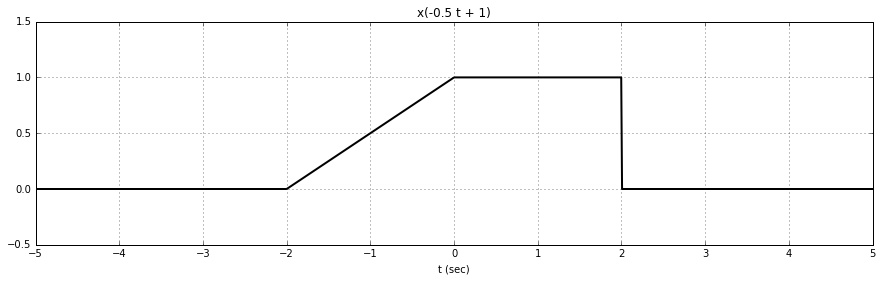

In [24]:
snapplot(t, x(-0.5*t + 1))
title('x(-0.5 t + 1)');

Any signal $x(t)$ has can be expressed as a sum of an odd and an even signal.

$$x(t)=\underset{\textrm{even part}}{\underbrace{\dfrac{1}{2}\left(x(t)+x(-t)\right)}+}\underset{\textrm{odd part}}{\underbrace{\dfrac{1}{2}\left(x(t)-x(-t)\right)}}.$$

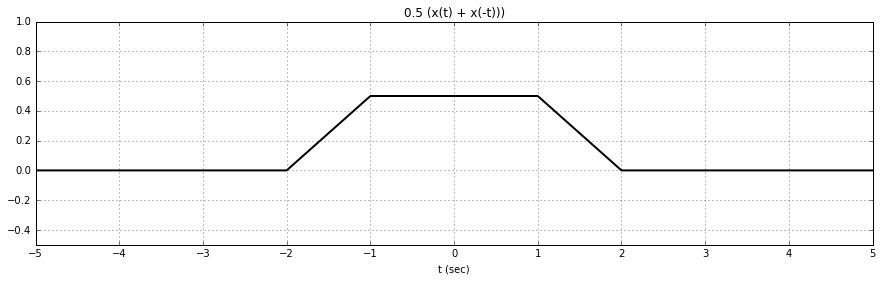

In [25]:
snapplot(t, 0.5 * (x(t) + x(-t))) # the even part of x(t)
title('0.5 (x(t) + x(-t)))');

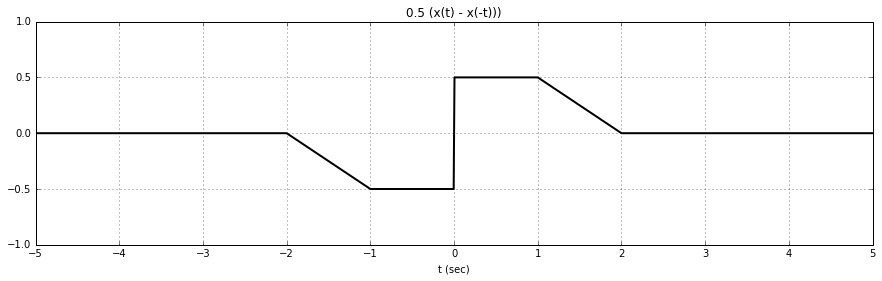

In [26]:
snapplot(t, 0.5 * (x(t) - x(-t))) # the odd part of x(t)
title('0.5 (x(t) - x(-t)))');

However, for any signal $x(t)$, $x(at+b)+x(-at+b)$ will always be even and  $x(at+b)-x(-at+b)$ will always be odd. The following examples depict this fact.

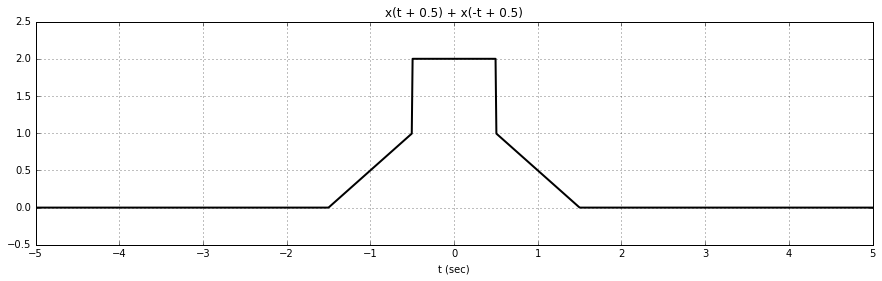

In [27]:
snapplot(t, x(t + 0.5) + x(-t + 0.5))
title('x(t + 0.5) + x(-t + 0.5)');

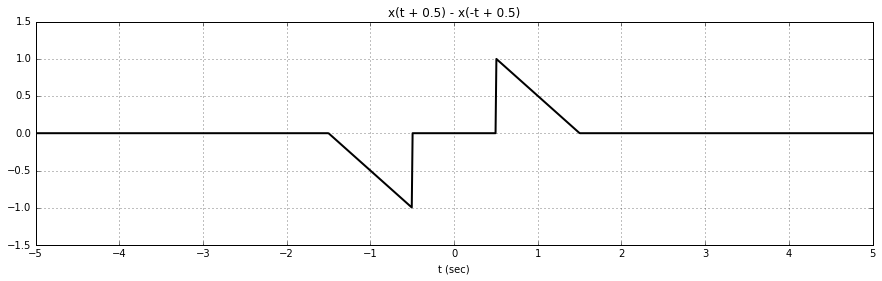

In [28]:
snapplot(t, x(t + 0.5) - x(-t + 0.5))
title('x(t + 0.5) - x(-t + 0.5)');

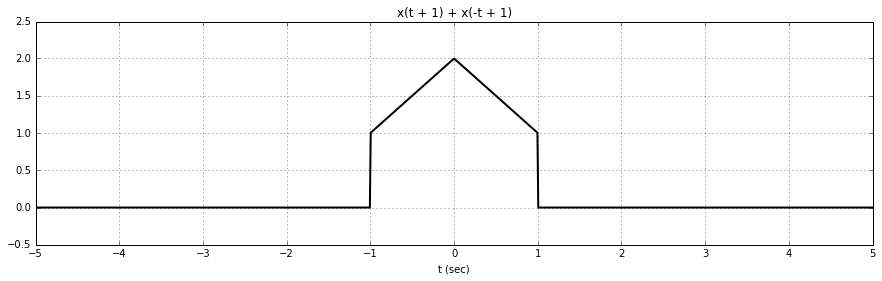

In [29]:
snapplot(t, x(t + 1) + x(-t + 1))
title('x(t + 1) + x(-t + 1)');

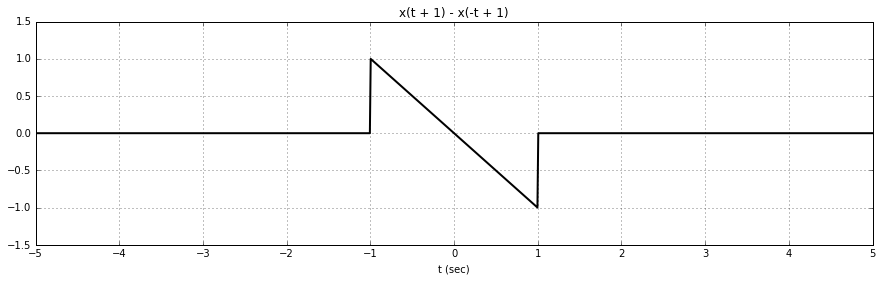

In [30]:
snapplot(t, x(t + 1) - x(-t + 1))
title('x(t + 1) - x(-t + 1)');

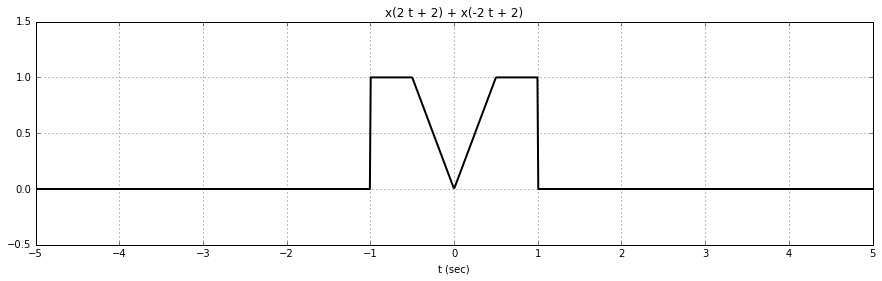

In [31]:
snapplot(t, x(2 * t + 2) + x(-2 * t + 2))
title('x(2 t + 2) + x(-2 t + 2)');

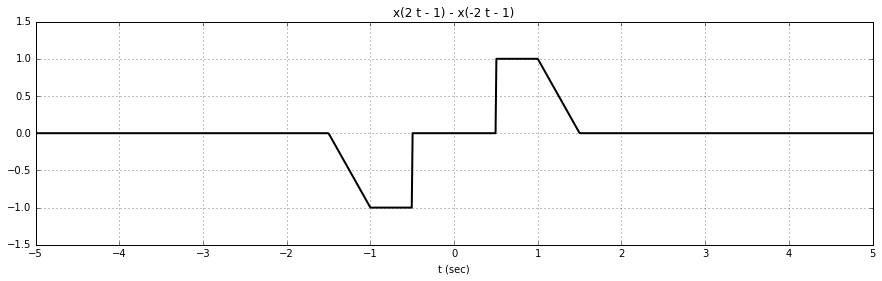

In [32]:
snapplot(t, x(2 * t - 1) - x(-2 * t - 1))
title('x(2 t - 1) - x(-2 t - 1)');

Continue playing with the signals! Let us plot $-2 x(-2 t + 1) + 2 x(t) - 3 x(t - 1)$.

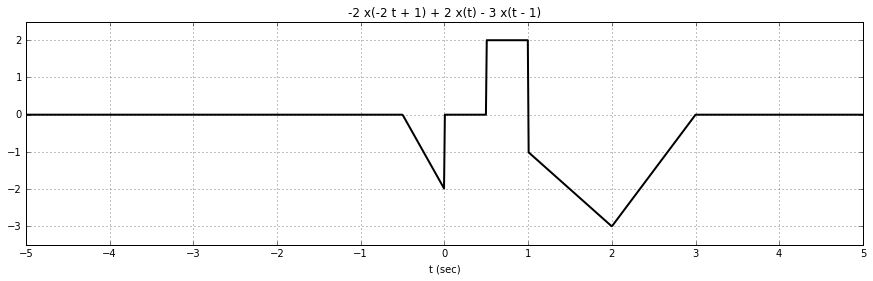

In [33]:
snapplot(t,  -2 * x(-2 * t + 1) + 2 * x(t) - 3 * x(t - 1))
title('-2 x(-2 t + 1) + 2 x(t) - 3 x(t - 1)');

Now, define another function $x(t) = r(t + 1) - 2 r(t - 1) + r(t - 2) - u(t - 3)$, over time $-10 \leq t \leq 10$.

In [34]:
t = linspace(-10, 10, 1000)
def x(t):
    return r(t + 1) - 2 * r(t - 1) + r(t - 2) - u(t - 3)

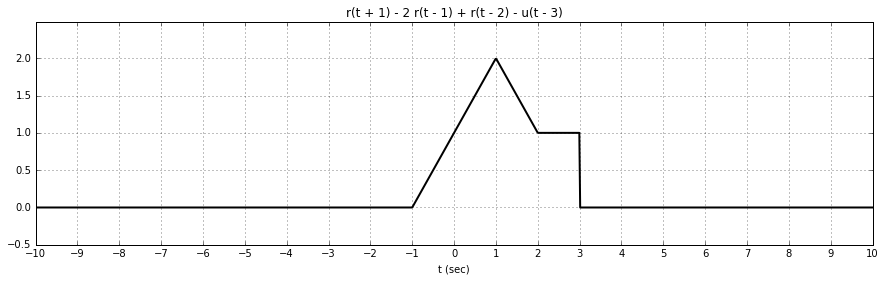

In [35]:
snapplot(t, x(t))
title('r(t + 1) - 2 r(t - 1) + r(t - 2) - u(t - 3)');

Now try doing different time domain operations on this one!